In [1]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = 2000
n_features = 1000

# number of topics
n_components = 10
# number of most common words per topic
n_top_words = 20

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [5]:
import csv

print("Loading dataset...")
t0 = time()

with open('/home/todorcevicm/Documents/praksa/archive/netflix_titles.csv', 'r', encoding = 'utf8') as netflix_titles:
    reader = csv.reader(netflix_titles, delimiter=',')
    data = []

    for row in reader:
        # here i just take the descriptions         
        data.append(row[11])
        

    data.remove(data[0])
    
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

Loading dataset...
done in 0.042s.


In [6]:
tfidf_vectorizer = TfidfVectorizer(
    max_df = 0.95, 
    min_df = 2, 
    max_features = n_features, 
    stop_words = "english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

done in 0.044s.


done in 0.086s.


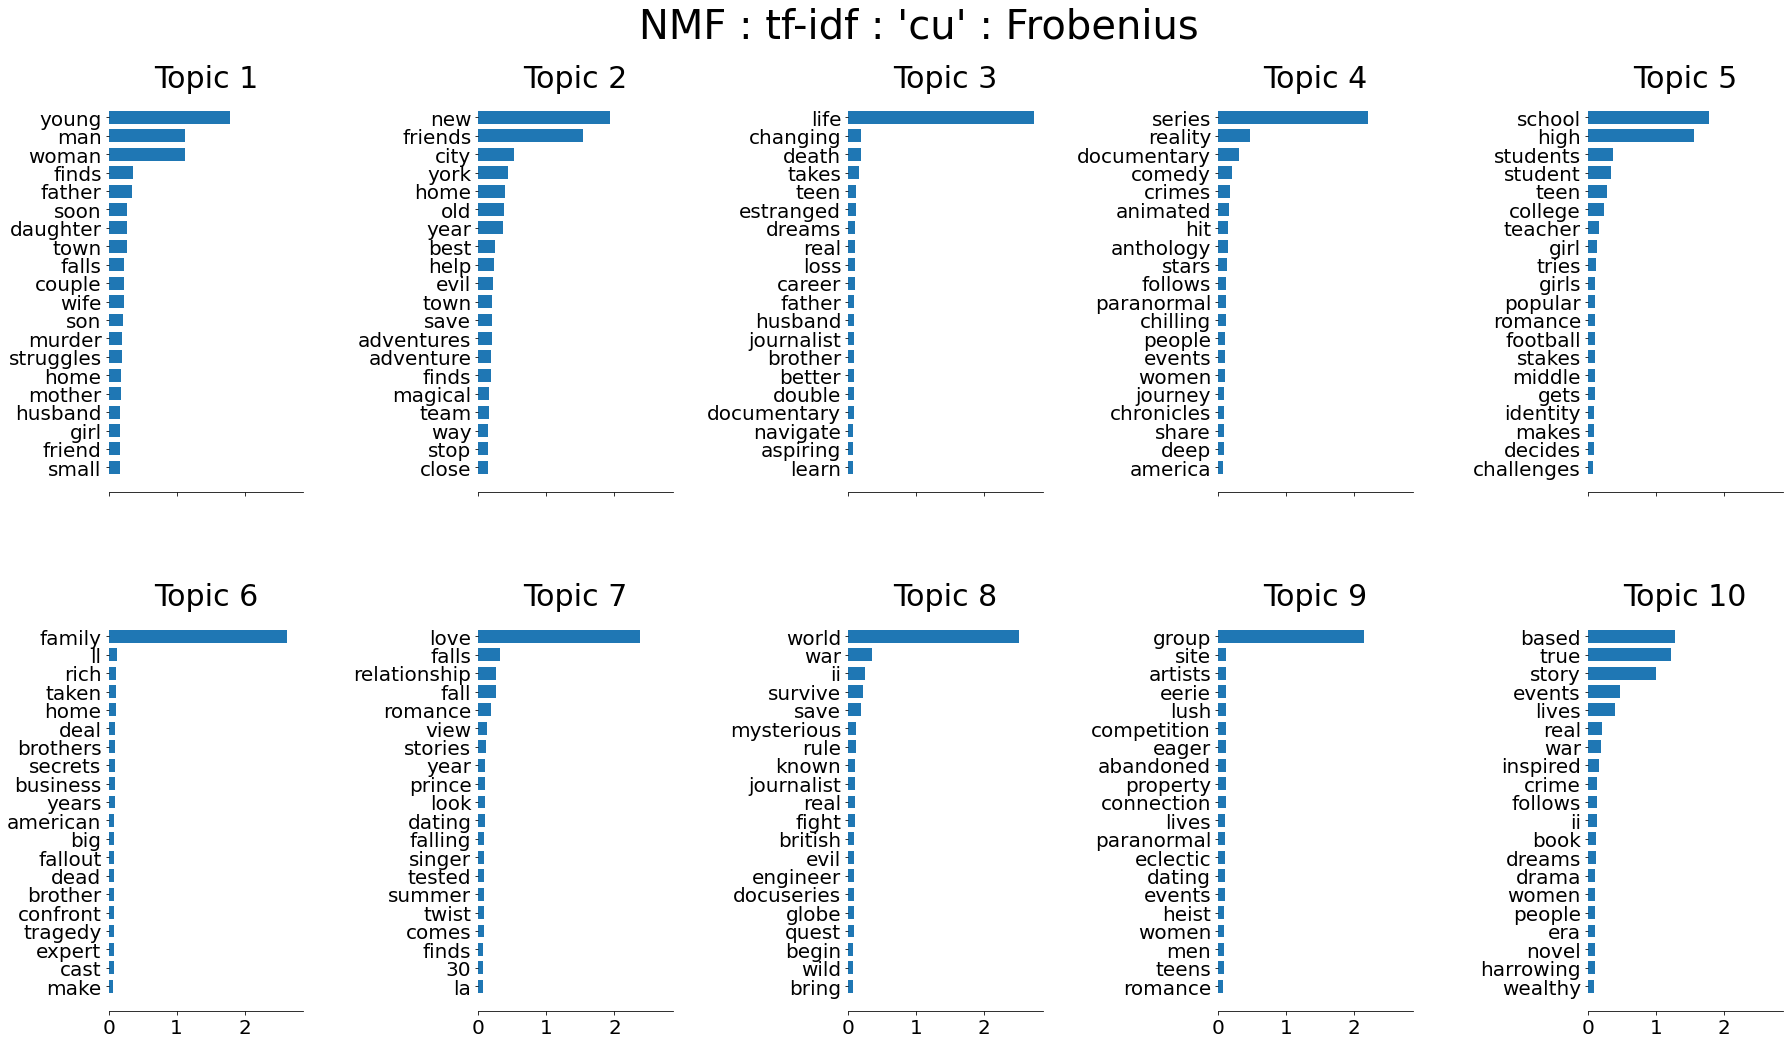

In [7]:
t0 = time()
nmf = NMF(
    n_components = n_components, 
    random_state = 1,
    alpha = 0.1,
    l1_ratio = 0.5
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, 
    tfidf_feature_names,
    n_top_words,
    "NMF : tf-idf : 'cu' : Frobenius"
)

In [8]:
tfidf_vectorizer = TfidfVectorizer(
    max_df = 0.95, 
    min_df = 2, 
    max_features = n_features, 
    stop_words = "english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

done in 0.038s.


done in 0.034s.


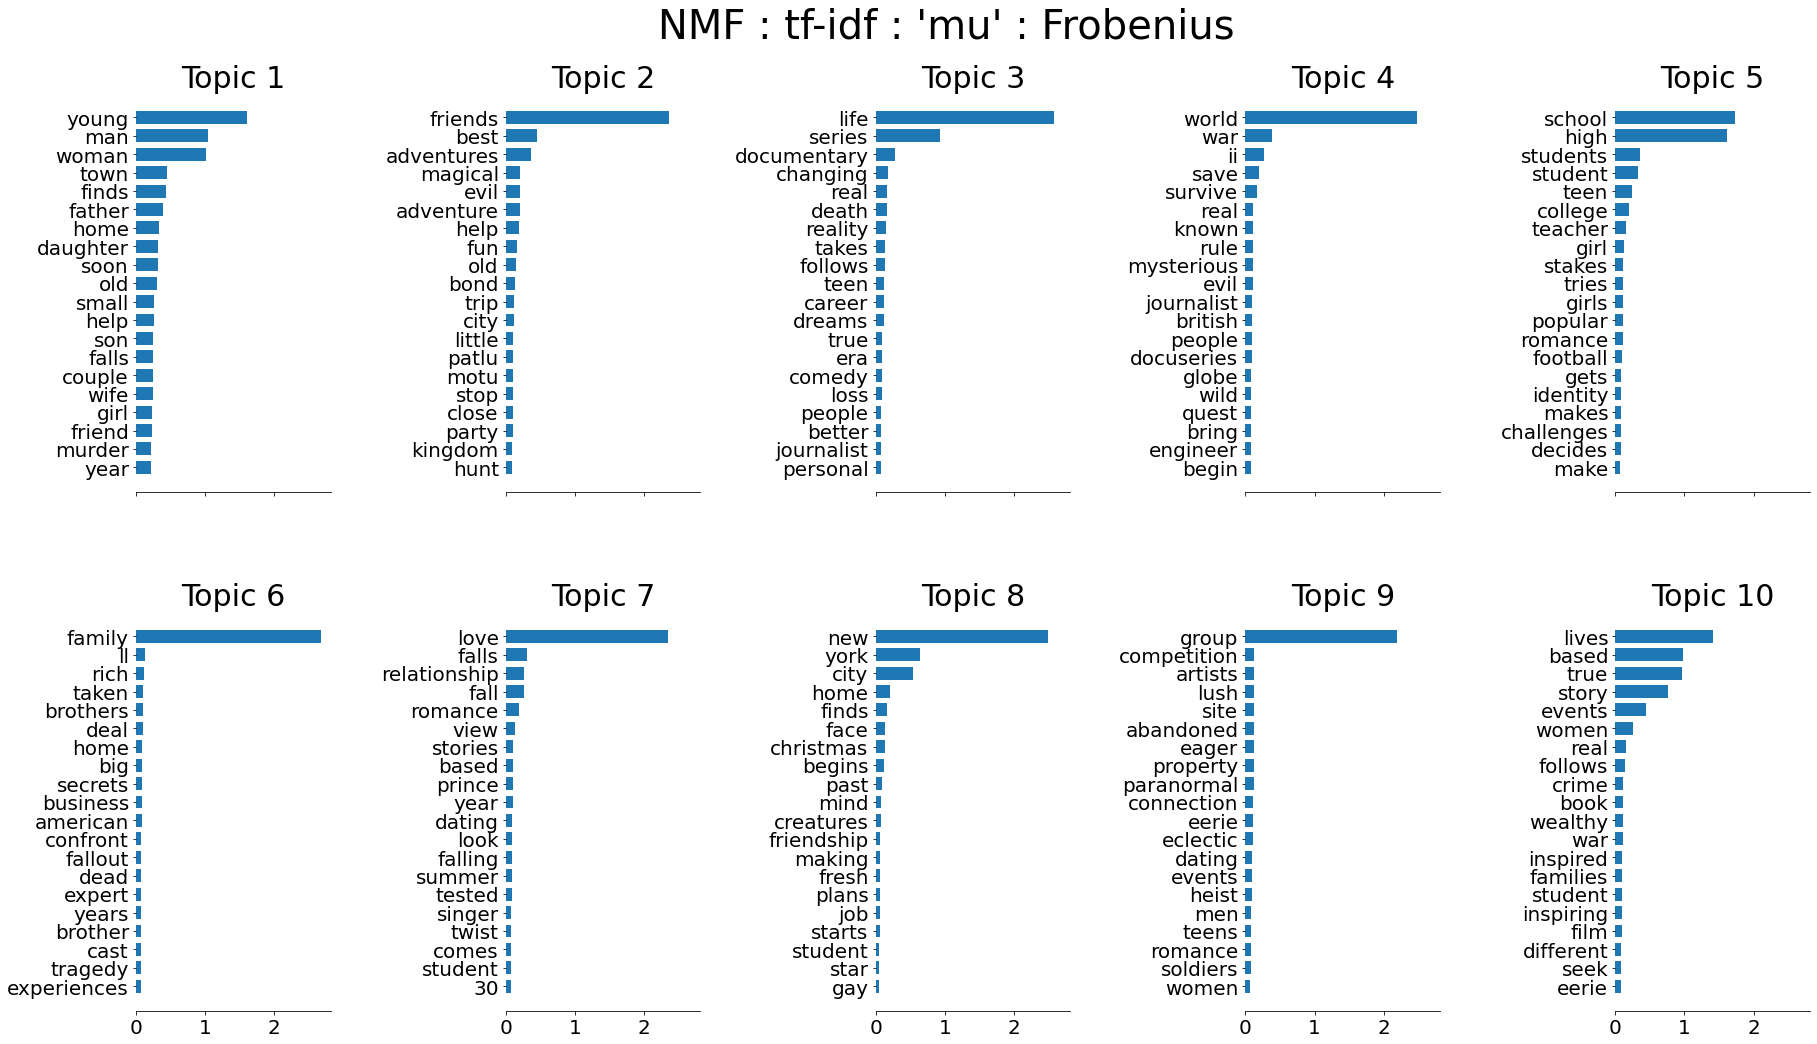

In [11]:
t0 = time()
nmf = NMF(
    n_components = n_components,
    random_state = 1,
    solver = "mu",
    max_iter = 1000,
    alpha = 0.1,
    l1_ratio = 0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "NMF : tf-idf : 'mu' : Frobenius",
)

In [12]:
tfidf_vectorizer = TfidfVectorizer(
    max_df = 0.95, 
    min_df = 2, 
    max_features = n_features, 
    stop_words = "english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

done in 0.038s.


done in 0.197s.


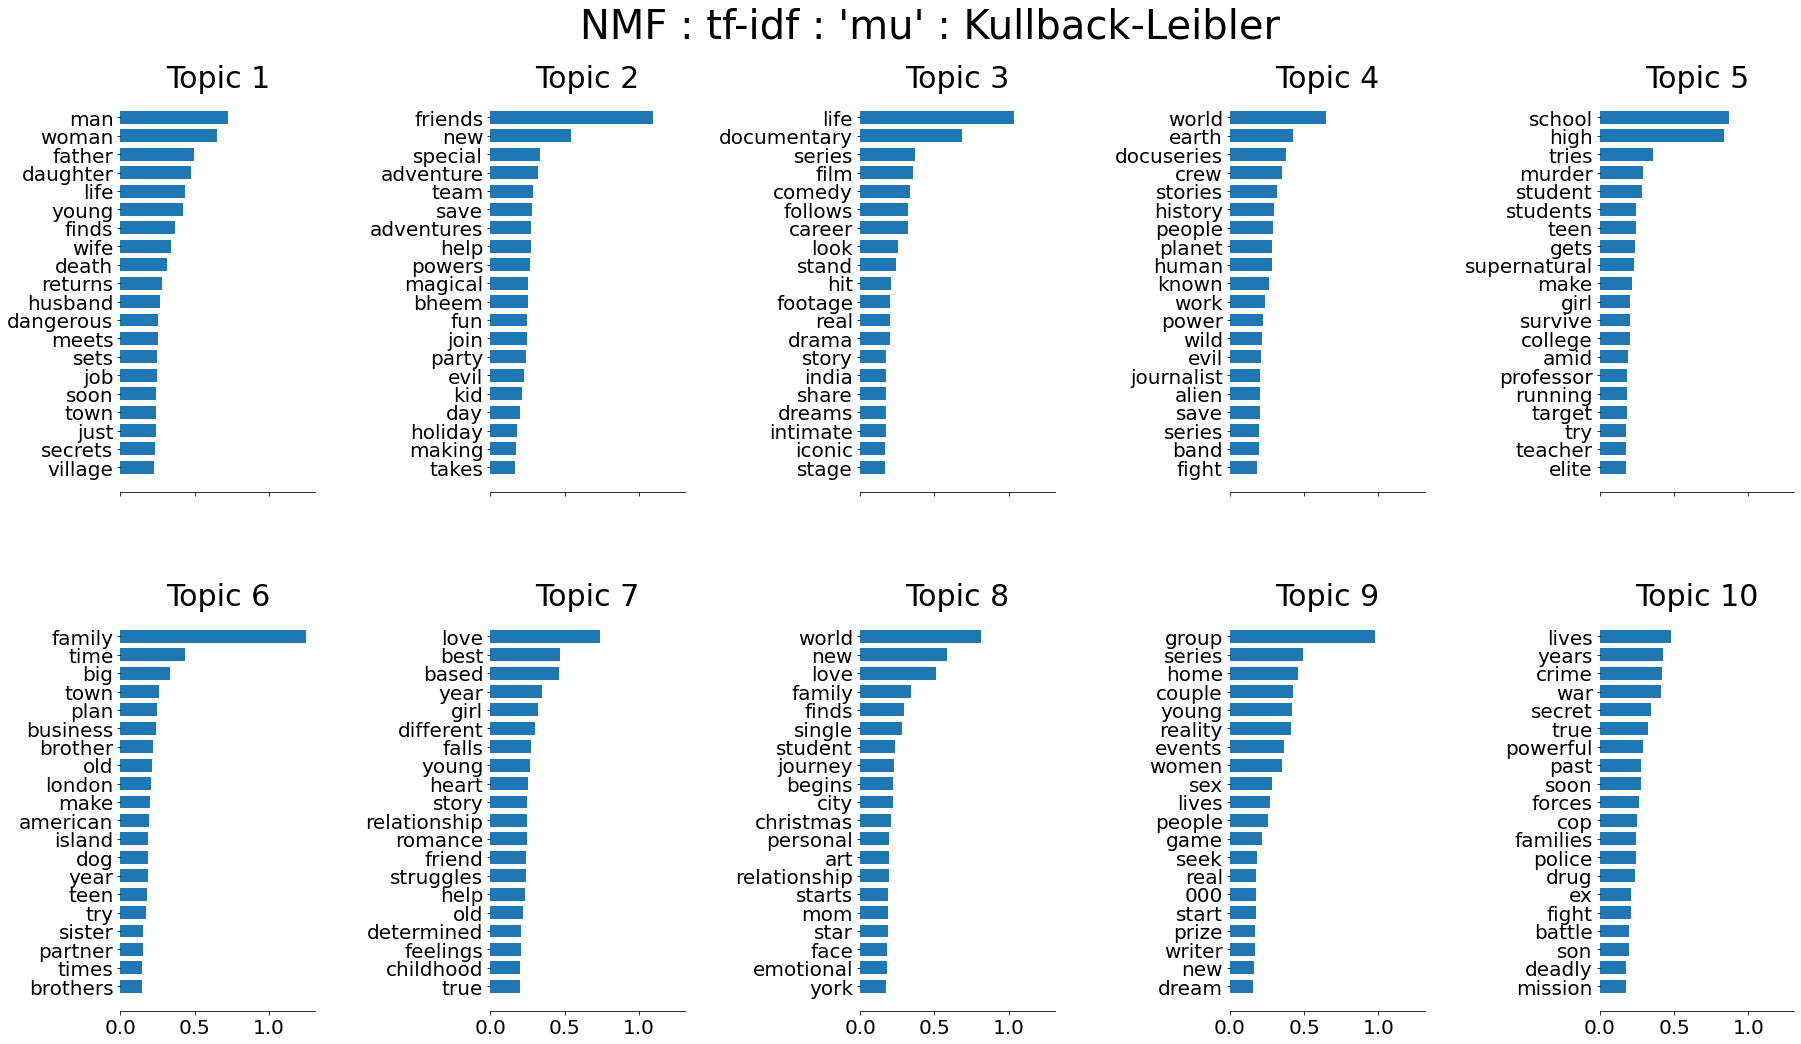

In [14]:
t0 = time()
nmf = NMF(
    n_components = n_components,
    random_state = 1,
    beta_loss = "kullback-leibler",
    solver = "mu",
    max_iter = 1000,
    alpha = 0.1,
    l1_ratio = 0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "NMF : tf-idf : 'mu' : Kullback-Leibler",
)

In [19]:
tf_vectorizer = CountVectorizer(
    max_df = 0.95, 
    min_df = 2, 
    max_features = n_features,
    stop_words = "english"
)

t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

done in 0.117s.


done in 0.175s.


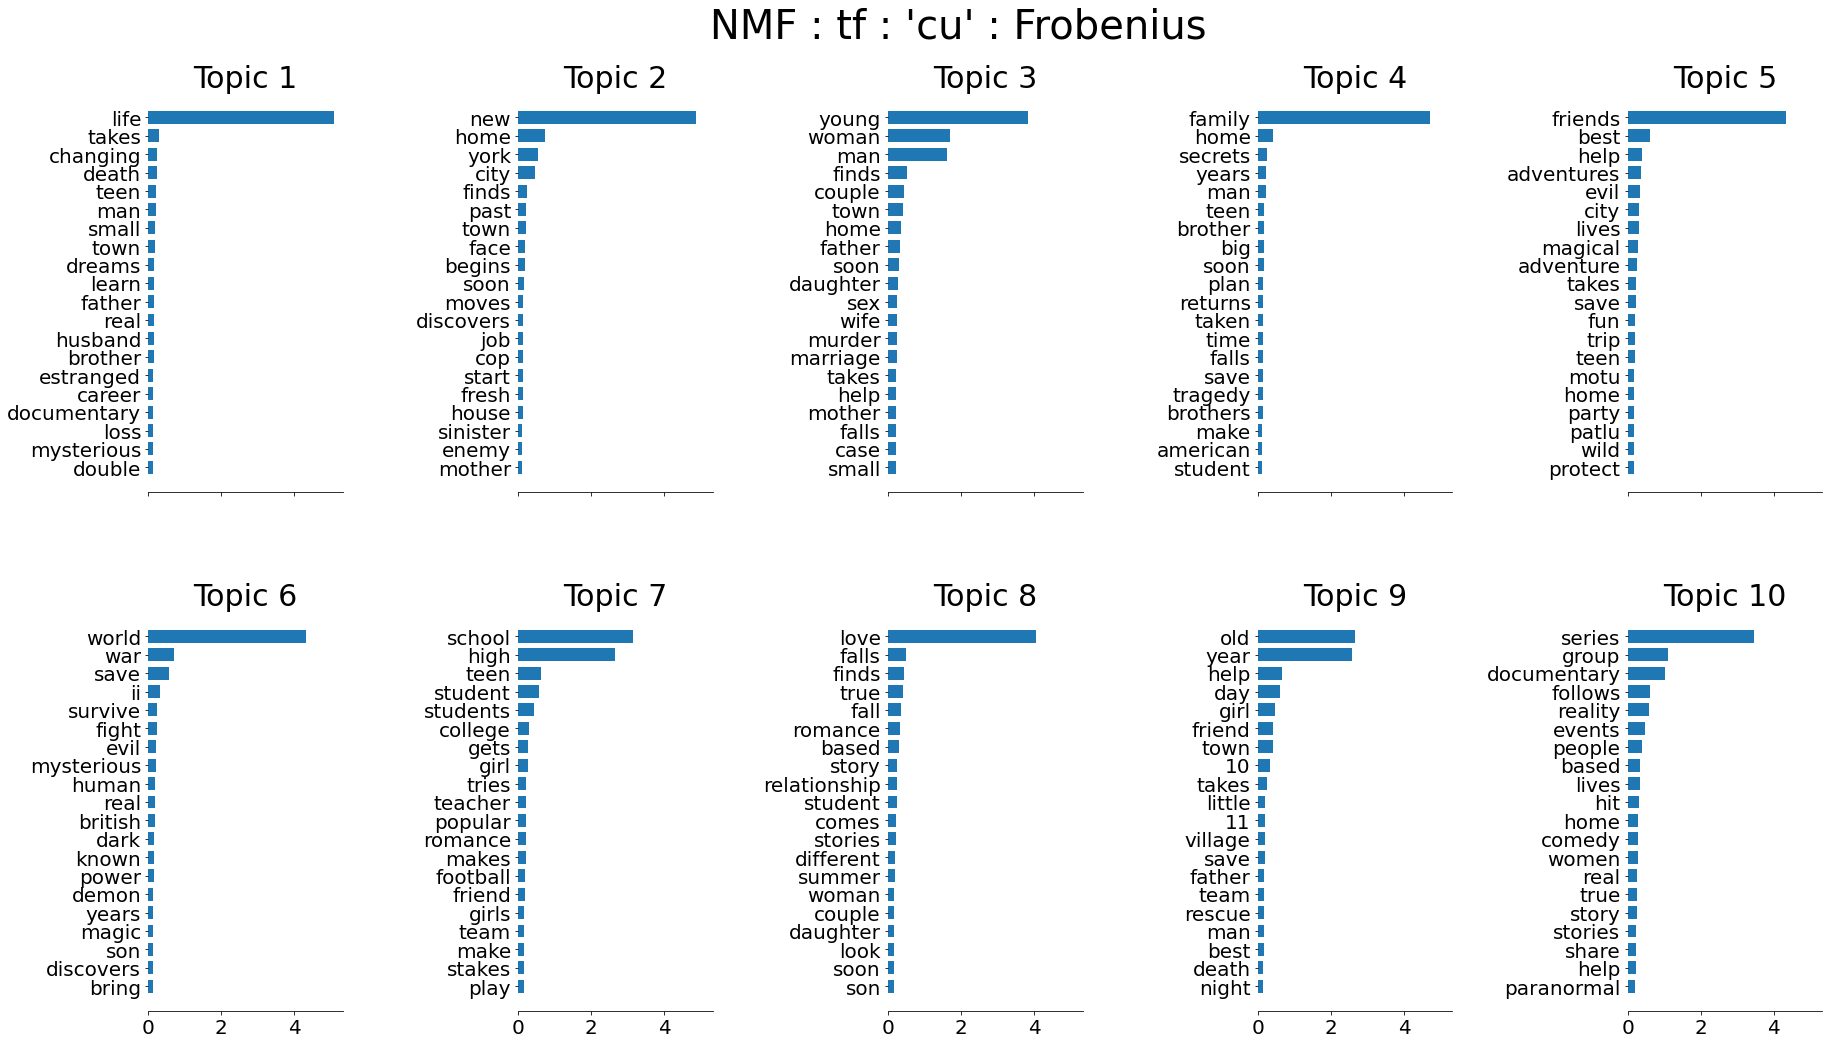

In [46]:
t0 = time()
nmf = NMF(
    n_components = n_components,
    random_state = 1,
    max_iter = 1000,
    alpha = 0.1,
    l1_ratio = 0.5,
).fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tf_feature_names,
    n_top_words,
    "NMF : tf : 'cu' : Frobenius"
)

In [23]:
tf_vectorizer = CountVectorizer(
    max_df = 0.95, 
    min_df = 2, 
    max_features = n_features,
    stop_words = "english"
)

t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

done in 0.038s.


done in 0.033s.


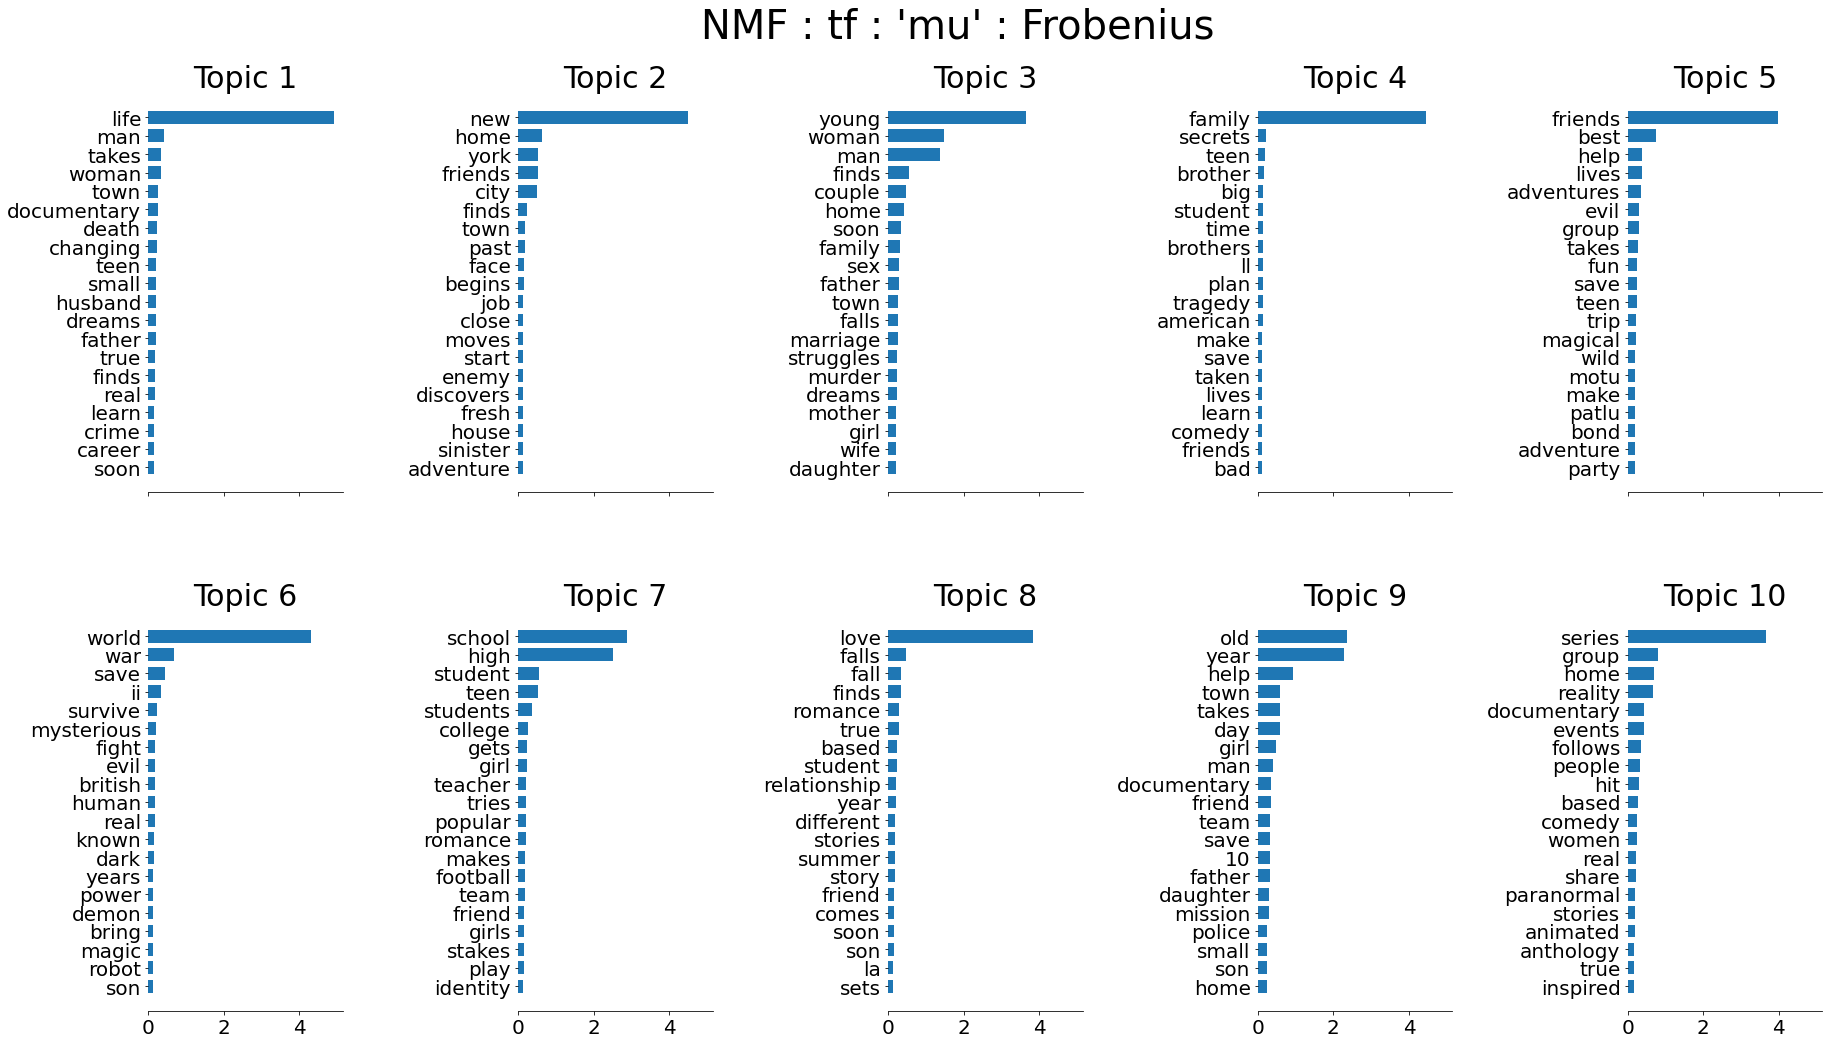

In [24]:
t0 = time()
nmf = NMF(
    n_components = n_components,
    random_state = 1,
    solver = "mu",
    max_iter = 1000,
    alpha = 0.1,
    l1_ratio = 0.5,
).fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tf_feature_names,
    n_top_words,
    "NMF : tf : 'mu' : Frobenius"
)

In [25]:
tf_vectorizer = CountVectorizer(
    max_df = 0.95, 
    min_df = 2, 
    max_features = n_features,
    stop_words = "english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

done in 0.040s.


done in 0.190s.


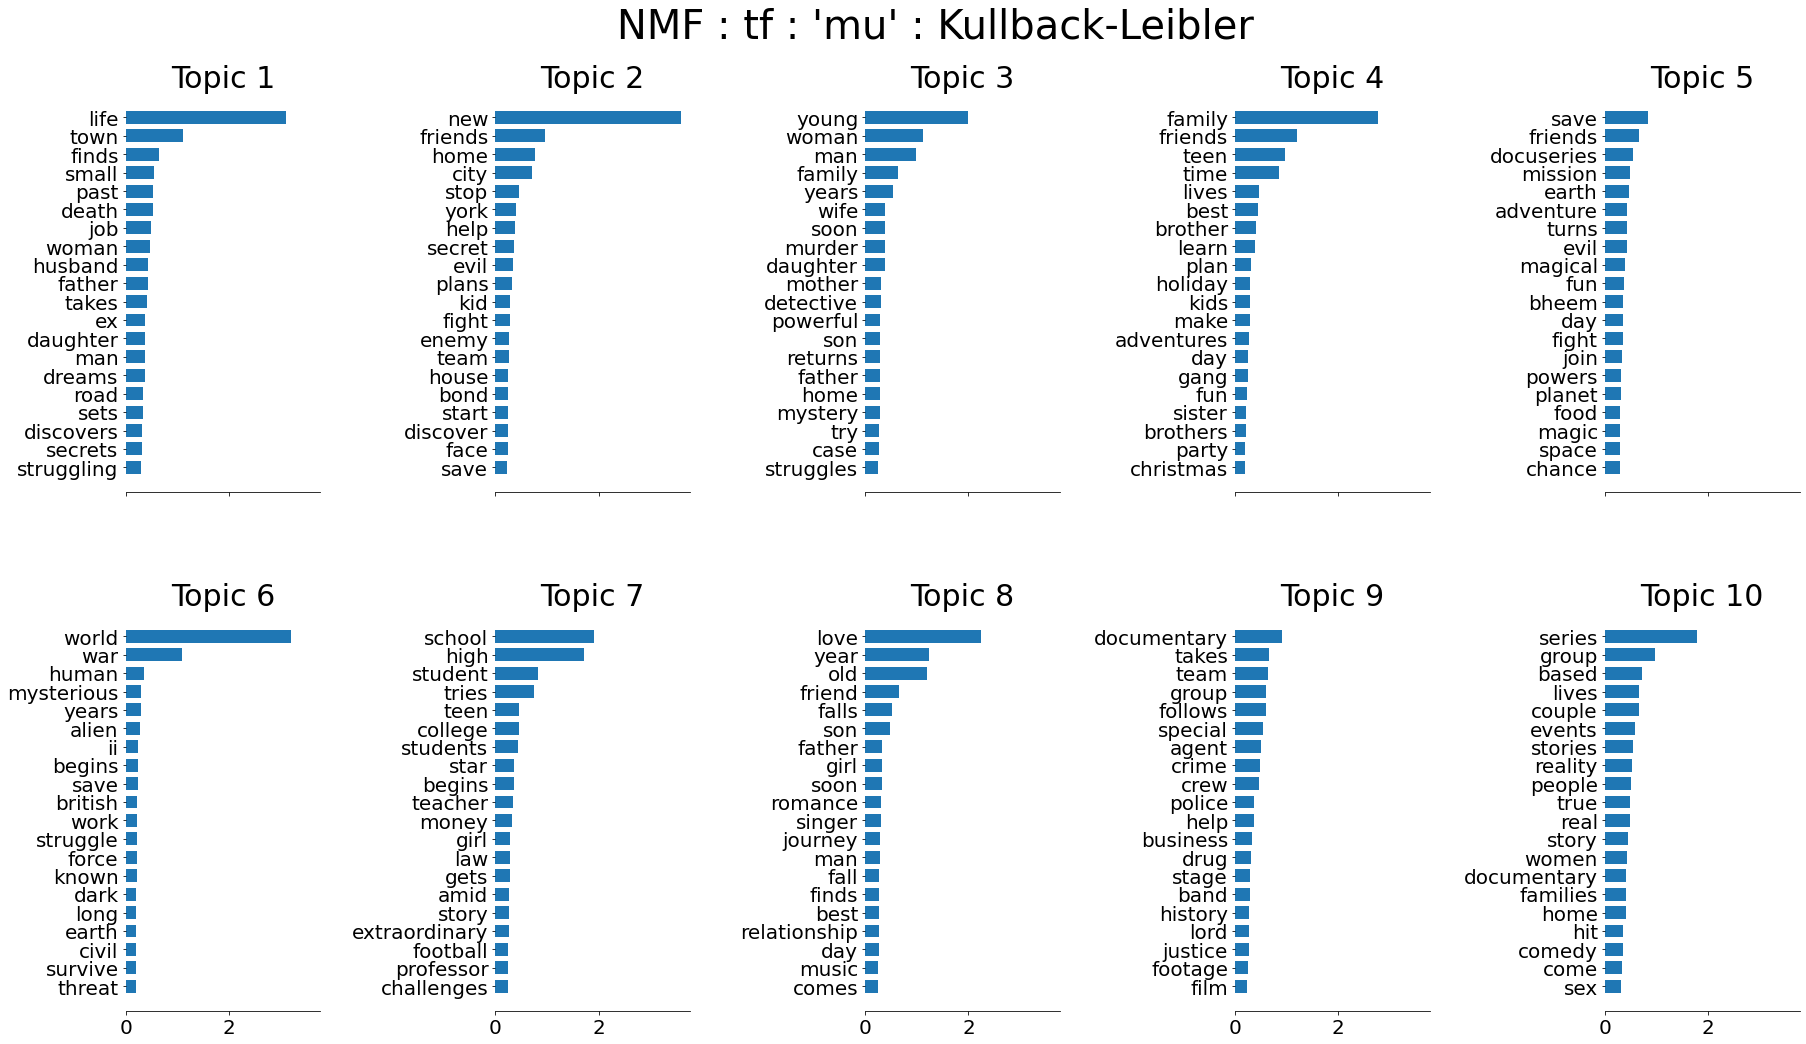

In [26]:
t0 = time()
nmf = NMF(
    n_components = n_components,
    random_state = 1,
    beta_loss = "kullback-leibler",
    solver = "mu",
    max_iter = 1000,
    alpha = 0.1, 
    l1_ratio = 0.5,
).fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, 
    tf_feature_names,
    n_top_words,
    "NMF : tf : 'mu' : Kullback-Leibler"
)

In [31]:
tfidf_vectorizer = TfidfVectorizer(
    max_df = 0.95, 
    min_df = 2,
    max_features = n_features, 
    stop_words = "english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

done in 0.038s.


done in 0.932s.


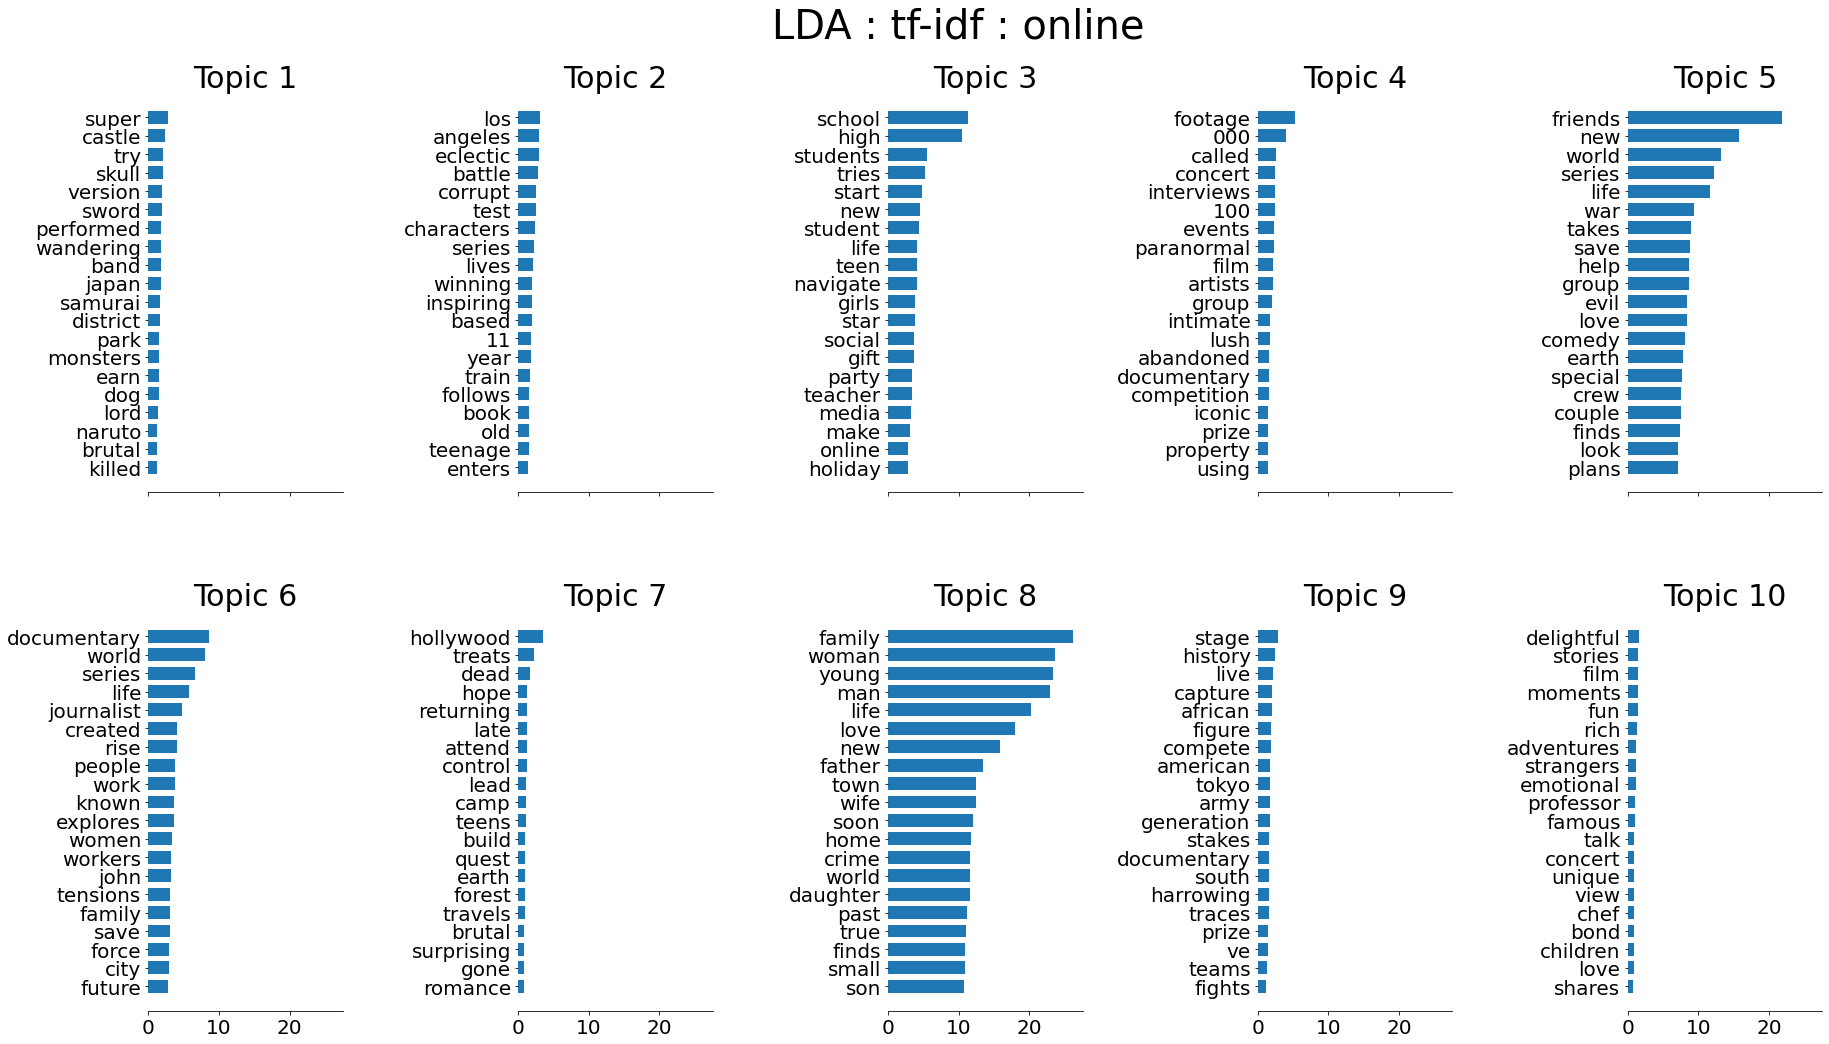

In [32]:
t0 = time()
lda = LatentDirichletAllocation(
    n_components = n_components,
    max_iter = 5,
    learning_method = "online",
    learning_offset = 50.0,
    random_state = 0
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    lda,
    tfidf_feature_names,
    n_top_words,
    "LDA : tf-idf : online"
)

In [30]:
tfidf_vectorizer = TfidfVectorizer(
    max_df = 0.95, 
    min_df = 2,
    max_features = n_features, 
    stop_words = "english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

done in 0.042s.


done in 0.934s.


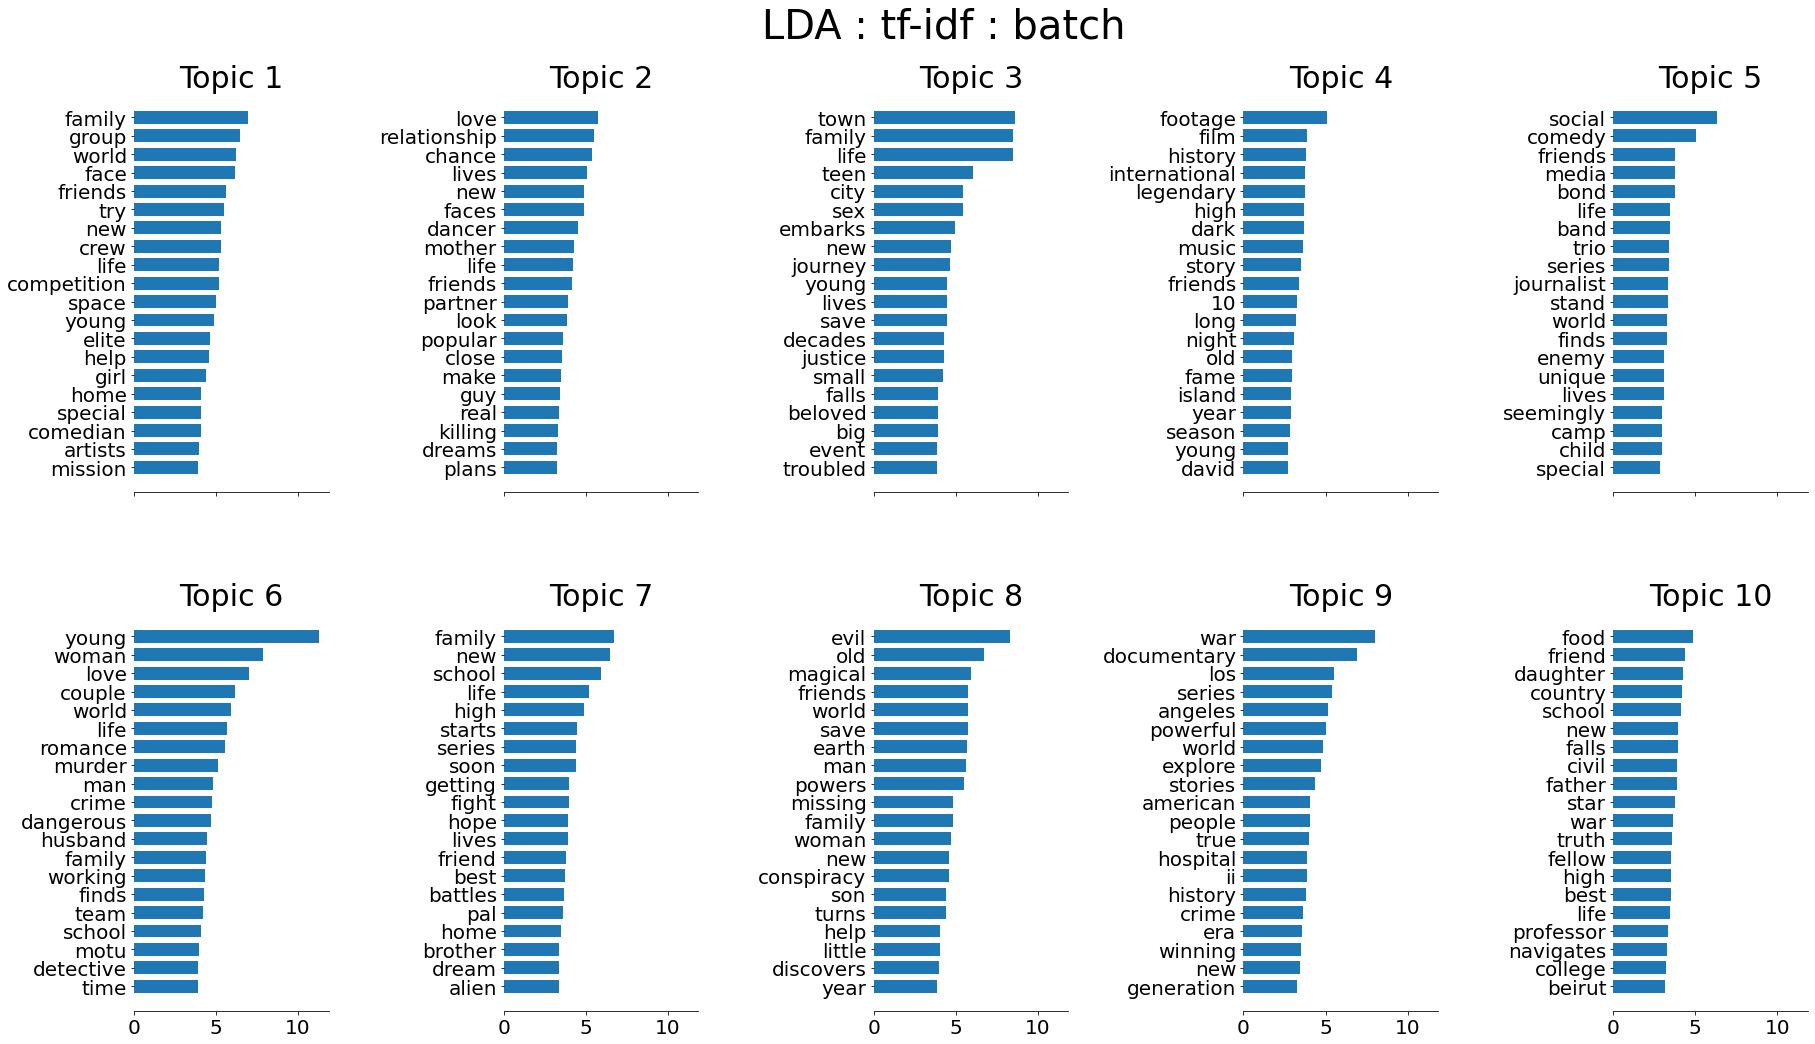

In [33]:
t0 = time()
lda = LatentDirichletAllocation(
    n_components = n_components,
    max_iter = 5,
    learning_method = "batch",
    learning_offset = 50.0,
    random_state = 0
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    lda,
    tfidf_feature_names,
    n_top_words,
    "LDA : tf-idf : batch"
)

In [39]:
tf_vectorizer = CountVectorizer(
    max_df = 0.95, 
    min_df = 2, 
    max_features = n_features,
    stop_words = "english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

done in 0.050s.


done in 1.323s.


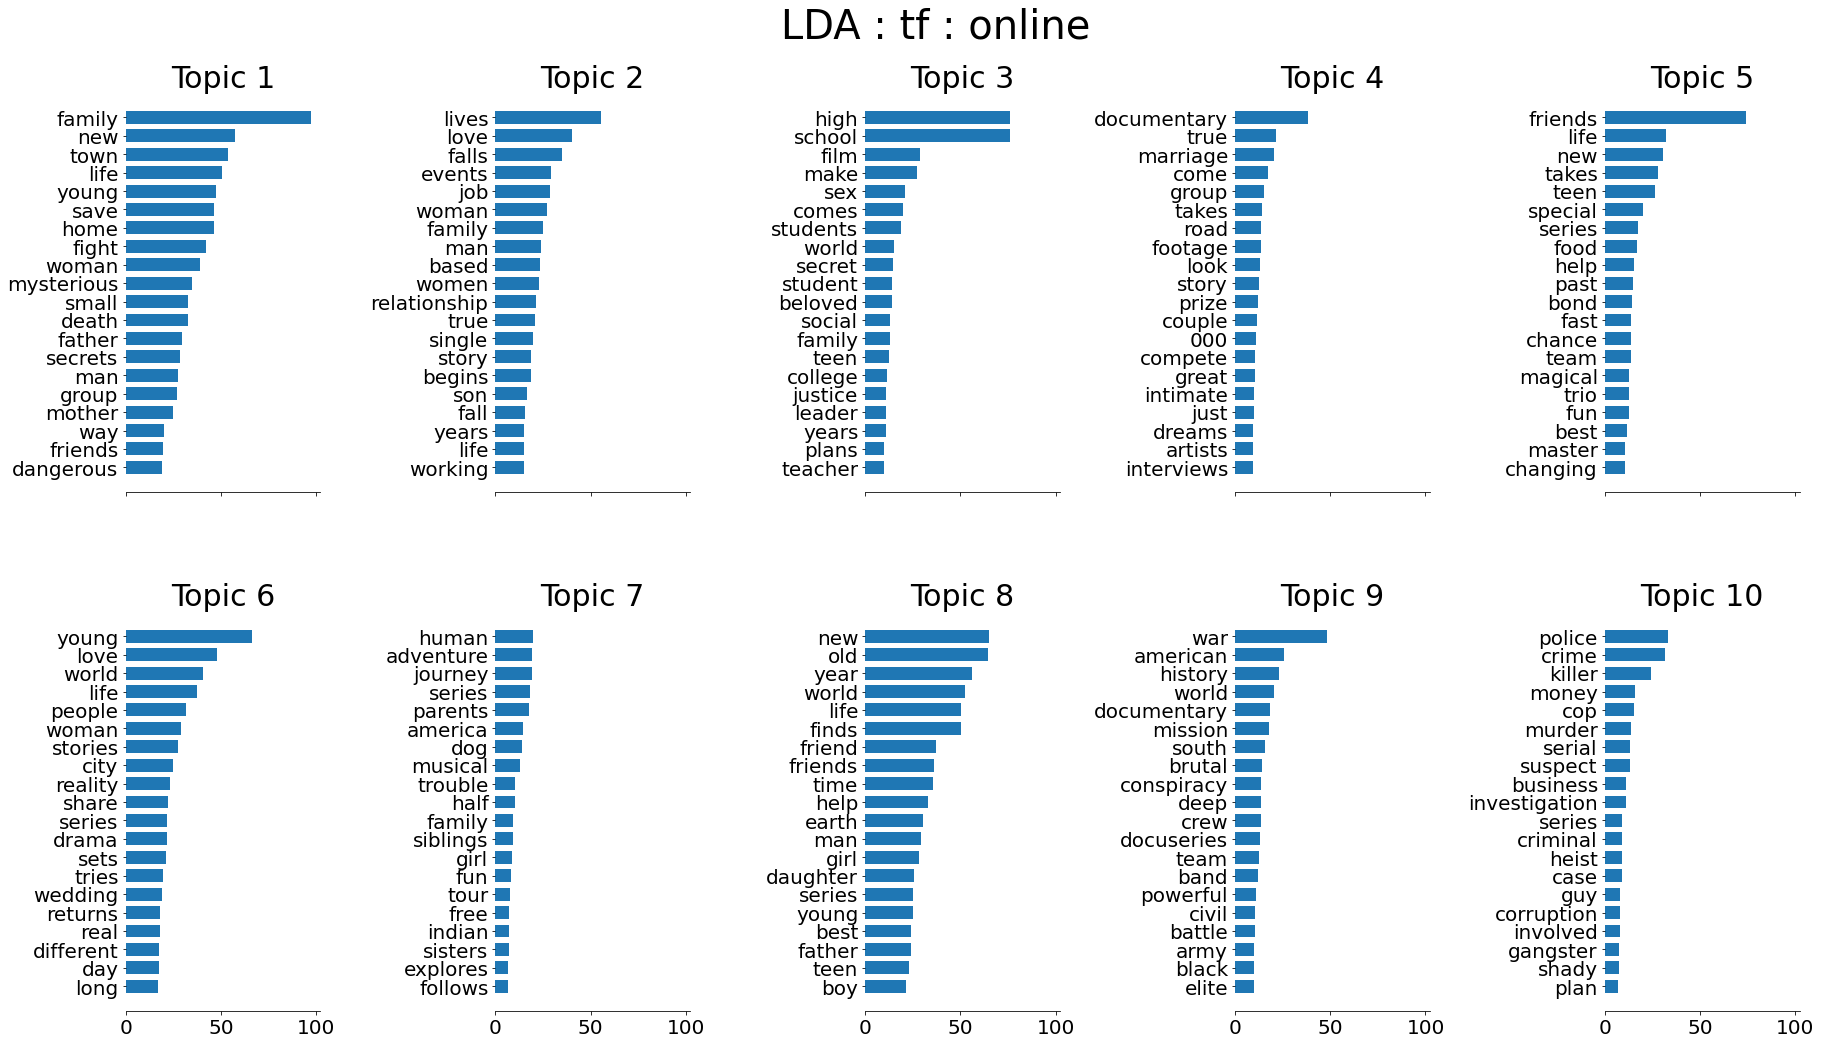

In [43]:
t0 = time()
lda = LatentDirichletAllocation(
    n_components = n_components,
    max_iter = 5,
    learning_method = "online",
    learning_offset = 50.0,
    random_state = 0
).fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(
    lda, 
    tf_feature_names, 
    n_top_words,
    "LDA : tf : online"
)

In [44]:
tf_vectorizer = CountVectorizer(
    max_df = 0.95, 
    min_df = 2, 
    max_features = n_features,
    stop_words = "english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

done in 0.041s.


done in 1.408s.


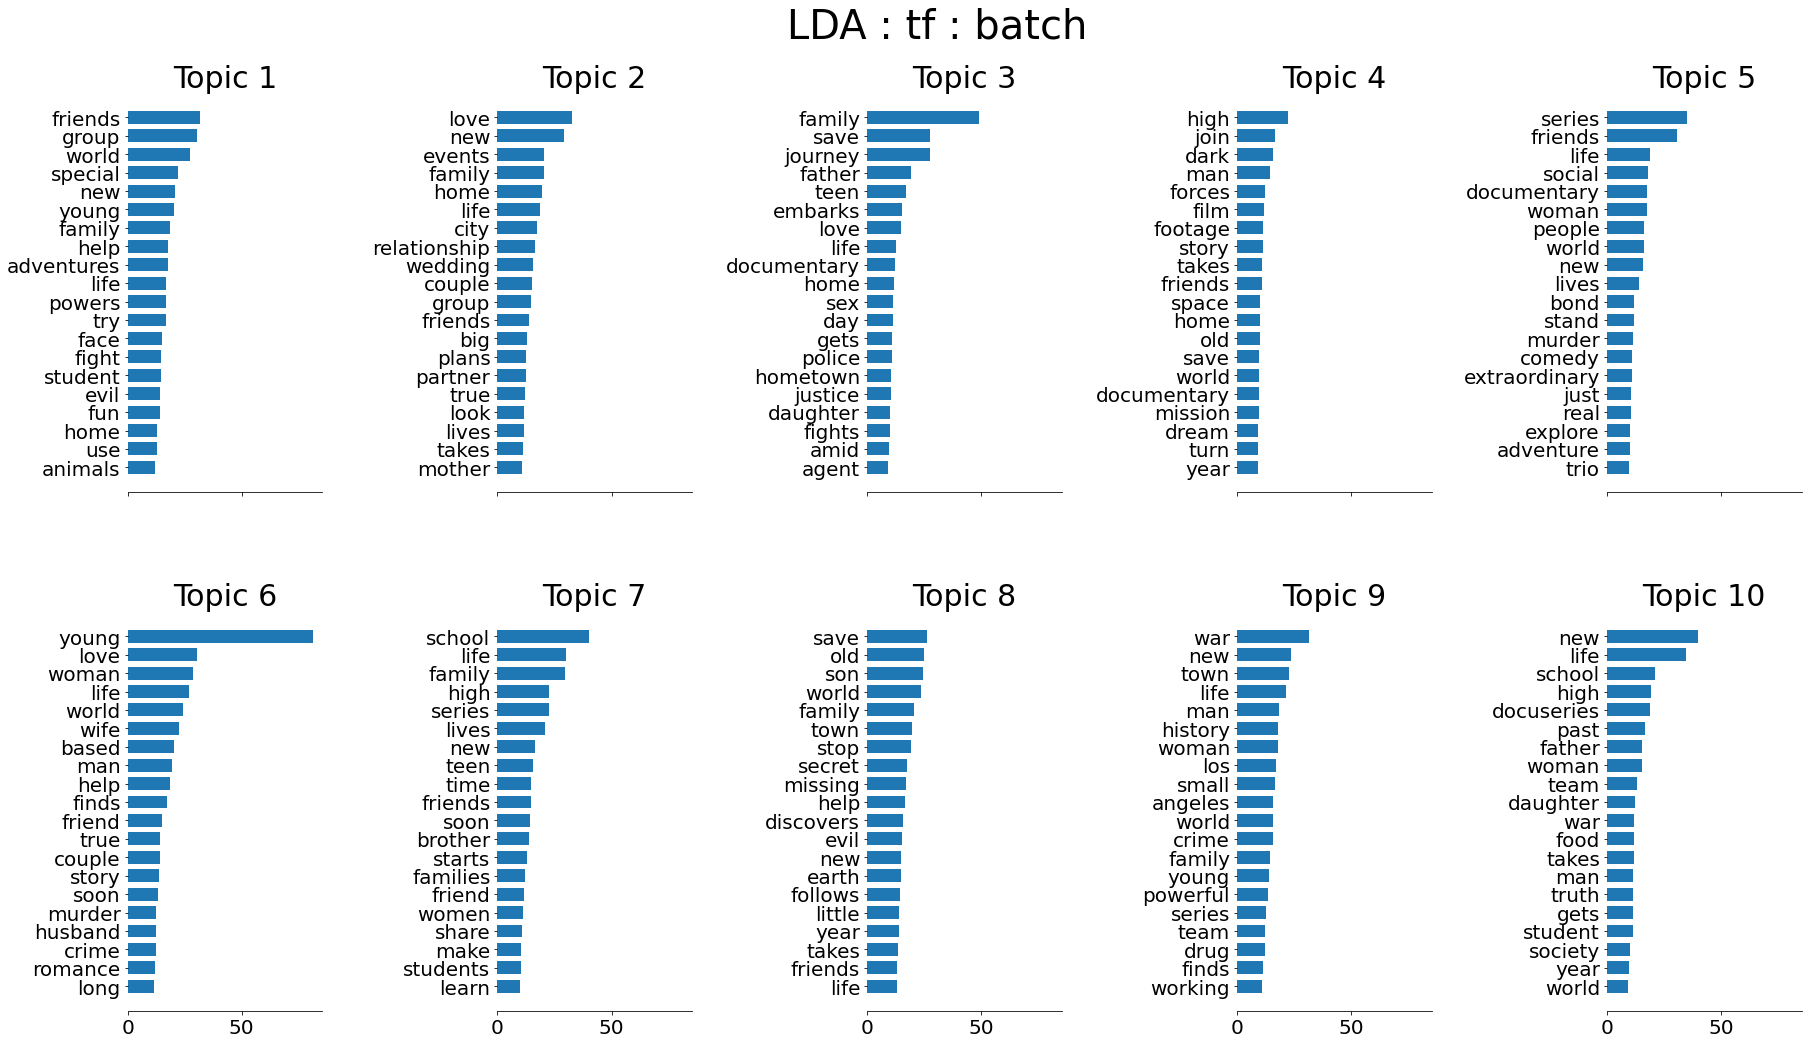

In [45]:
t0 = time()
lda = LatentDirichletAllocation(
    n_components = n_components,
    max_iter = 5,
    learning_method = "batch",
    learning_offset = 50.0,
    random_state = 0
).fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(
    lda, 
    tf_feature_names, 
    n_top_words,
    "LDA : tf : batch"
)